# SAM 2

In [1]:
from ultralytics import SAM
import matplotlib.pyplot as plt

model = SAM("sam_l.pt")
model2 = SAM("sam2.1_l.pt")

In [6]:
import torch
import gc

gc.collect()
torch.cuda.empty_cache()

In [2]:
# results = model("/media/hassan/bcb92a62-3ee4-4487-9c94-63c86da7fdda/computer_vision/InPainting/woman.png", imgsz=1024, points=[-100,-100])
results = model("/media/hassan/bcb92a62-3ee4-4487-9c94-63c86da7fdda/computer_vision/InPainting/man.jpg")
results2 = model2("/media/hassan/bcb92a62-3ee4-4487-9c94-63c86da7fdda/computer_vision/InPainting/man.jpg")


image 1/1 /media/hassan/bcb92a62-3ee4-4487-9c94-63c86da7fdda/computer_vision/InPainting/man.jpg: 1024x1024 1 0, 1 1, 1 2, 1 3, 1 4, 1 5, 1 6, 1 7, 1 8, 1 9, 1 10, 1 11, 1 12, 1 13, 1 14, 1 15, 1 16, 1 17, 1 18, 1 19, 10217.6ms
Speed: 11.2ms preprocess, 10217.6ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

image 1/1 /media/hassan/bcb92a62-3ee4-4487-9c94-63c86da7fdda/computer_vision/InPainting/man.jpg: 1024x1024 1 0, 1 1, 1 2, 1 3, 1 4, 1 5, 6669.8ms
Speed: 3.7ms preprocess, 6669.8ms inference, 0.4ms postprocess per image at shape (1, 3, 1024, 1024)


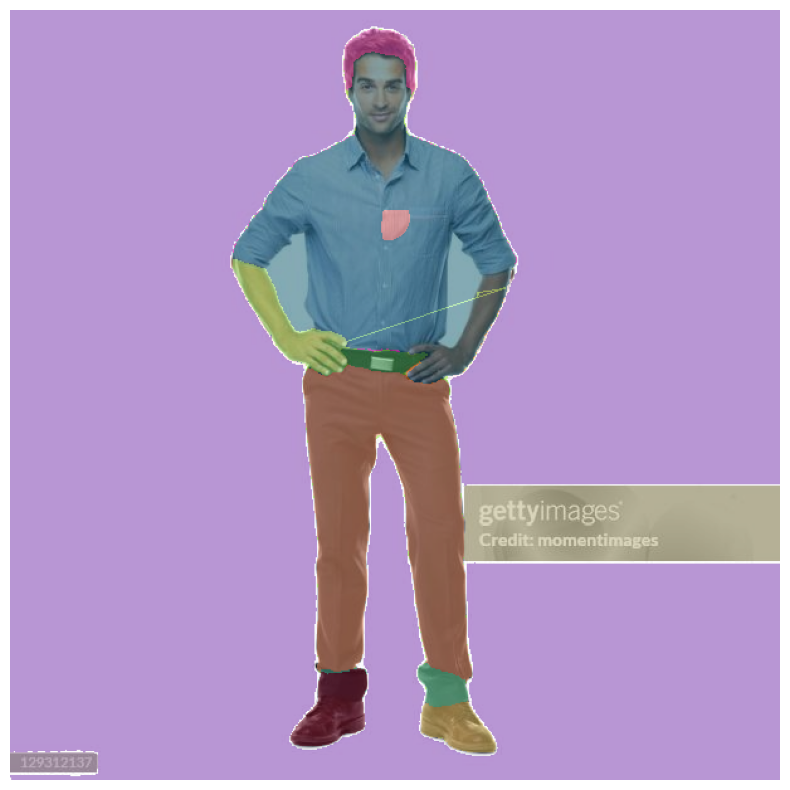

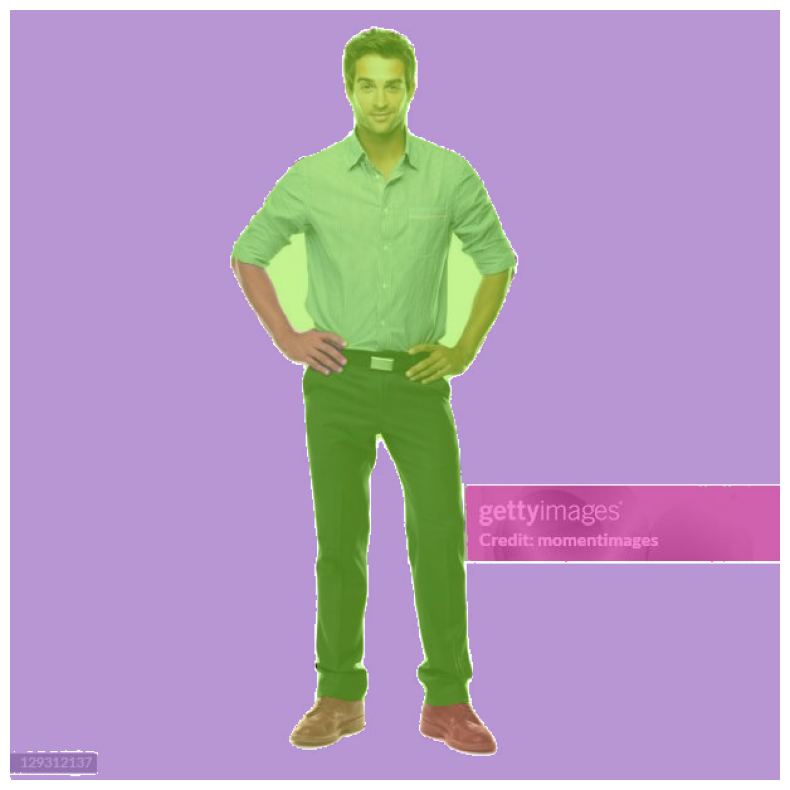

In [4]:
import cv2
import numpy as np

original_apth = "/media/hassan/bcb92a62-3ee4-4487-9c94-63c86da7fdda/computer_vision/InPainting/man.jpg"
original_image = cv2.imread(original_apth)
h, w, c = original_image.shape
alpha = 0.5

# masks_only_image = np.zeros((h, w, 3), dtype=np.uint8)
overlay = original_image.copy()

def display(results, image, overlay, alpha):
    if results and results[0].masks:
        for i, mask in enumerate(results[0].masks.xy):
            pts = np.array(mask, np.int32)
            pts = pts.reshape(-1, 1, 2)

            np.random.seed(i)
            color = np.random.randint(0, 255, size=(3,)).tolist()

            cv2.fillPoly(overlay, [pts], color)

    final_image = cv2.addWeighted(overlay, alpha, original_image, 1 - alpha, 0)

    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')



display(results, original_image, overlay, alpha)
display(results2, original_image, overlay, alpha)

In [5]:
print(results2[0].masks.data.shape)

print(original_image.shape)

torch.Size([6, 612, 612])
(612, 612, 3)


# MMFashion

#############################################